# Newton's method, Gradient Descent and Autograd using Python

In [20]:
import numpy as np
import pandas as pd
import math

### Recall newton's method

\begin{equation}
x_{n+1} = x_n -\dfrac{f'(x_n)}{f''(x_{n+1})}
\end{equation}



In [2]:
def newton(x):
    return x-df(x)/ddf(x)

### Example:
We will use this function  
\begin{equation}
f(x)= x^3-4x.
\end{equation}
This has a derivative 
$f'(x)=3x^2-4$ and $f''(x)=6x.$ 

We will find a local minimizer of $f$, which we can see that occurs when $x=\sqrt{\frac{4}{3} } \approx 1.1547 .$

In [3]:
f =  lambda x: x**3-4*x
df = lambda x:3*x**2-4
ddf = lambda x:6*x

In [4]:
x = 2.0
print(x)
for k in range(10):
    x = newton(x)
    print(x)
math.sqrt(4/3)

2.0
1.3333333333333335
1.1666666666666667
1.1547619047619047
1.1547005400098185
1.1547005383792515
1.1547005383792515
1.1547005383792515
1.1547005383792515
1.1547005383792515
1.1547005383792515


1.1547005383792515

## Multidimensional case

Newton's method for multidimensional case is
$$
x_{n+1} =x_{n}-(D^2f(x))^{-1}Df(x)
$$

In [5]:
from numpy.linalg import inv

def newtonmulti(x):
    return x-df(x)@inv(ddf(x)) # we can use np.dot

### Example 2:
We will use this function  
\begin{equation}
f(x,y)= x^2y-2xy^2+3xy+4.
\end{equation}
The first and second derivatives are:
 $Df(x)=  \begin{bmatrix} 
 y(2x-2y+3) &x(x-4y+3)
 \end{bmatrix} $
 
 and
 $D^2f(x)=  \begin{bmatrix} 
 2y &  2x-4y+3\\ 2x-4y+3 &-4x
 \end{bmatrix} $

In [9]:
f =  lambda x: x[0]**2*x[1]-2*x[0]*x[1]**2+3*x[0]*x[1]+4
df = lambda x:np.array([x[1]*(2*x[0]-2*x[1]+3),x[0]*(x[0]-4*x[1]+3)])
ddf = lambda x:np.array([[2*x[1],2*x[0]-4*x[1]+3], [2*x[0]-4*x[1]+3,-4*x[0]]])

In [10]:
x = np.array([-1.5,0.8])
print(x,'\n')
print(f(x),'\n')
print(df(x),'\n')
print(ddf(x),'\n')

[-1.5  0.8] 

4.120000000000001 

[-1.28  2.55] 

[[ 1.6 -3.2]
 [-3.2  6. ]] 



In [11]:
for k in range(10):
    x =  newtonmulti(x)
    print(x)

[-0.75   0.775]
[-1.18241627  0.33187799]
[-1.0147222   0.47894356]
[-1.00068455  0.49958848]
[-0.99999992  0.49999986]
[-1.   0.5]
[-1.   0.5]
[-1.   0.5]
[-1.   0.5]
[-1.   0.5]


## Gradient Descent

Recall gradien descent


In [12]:
def gradient_descent(x,alpha):
    return x-alpha*df(x)

In [13]:
f =  lambda x: x[0]**2*x[1]-2*x[0]*x[1]**2+3*x[0]*x[1]+4
df = lambda x:np.array([x[1]*(2*x[0]-2*x[1]+3),x[0]*(x[0]-4*x[1]+3)])

In [25]:
x = np.array([-1.5,0.8])
for k in range(500):
    x =  gradient_descent(x,0.1)
print(x)

[-1.   0.5]


## Autograd

In [23]:
from autograd import grad

In [27]:
f =  lambda x: x[0]**2*x[1]-2*x[0]*x[1]**2+3*x[0]*x[1]+4
df = grad(f)
x = np.array([-1.5,0.8])
for k in range(500):
    x =  gradient_descent(x,0.1)
print(x)

[-1.   0.5]


I want to find the best parobola to fit the data. f(x) = ax^2+bx+c. Unknowns are a,b,c. It is linear in unknowns. We can solve this using least squares. $D = \lbrace x_i,y_i\rbrace_{i=1}^n$. What are a,b,c such that it minimizes the errors. Define our loss unfunction as $$L(a,b,c) =  \frac{1}{n}\sum_{=1}{n}(f(x_i)-y_i)^2$$

This is a linear algebra problem because unknowns are linear. So we can show this using matrix notation. Let z = (a,b,c)^T

### Curve Fitting Example

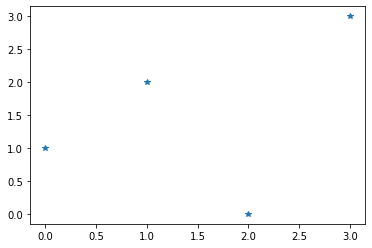

In [35]:
import matplotlib.pyplot as plt
data = np.array([(0,1),(1,2),(2,0),(3,3)])
plt.plot(data[:,0], data[:,1],"*")
plt.show()

In [36]:
print(data)

[[0 1]
 [1 2]
 [2 0]
 [3 3]]


In [38]:
A = np.vstack((data[:,0]**2,data[:,0],np.ones(4))).T
A

array([[0., 0., 1.],
       [1., 1., 1.],
       [4., 2., 1.],
       [9., 3., 1.]])

$\theta = (A^T*A)^{-1}A^{-1}b$

In [40]:
theta = inv(A.T@A)@A.T@data[:,1]
print(theta)

[ 0.5 -1.1  1.4]


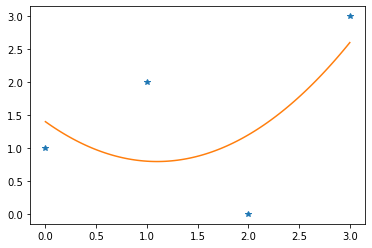

In [46]:
x = np.linspace(0,3,100)
y = theta[0]*x**2+theta[1]*x+theta[2]
plt.plot(data[:,0],data[:,1],'*',x,y,'-')
plt.show()

In [48]:
#Set
n = data.shape[0]
print(n)

4


In [49]:
def loss(theta):
    loss = 0
    for k in range(n):
        x = data[k,0]#this is ineffec.
        y = data[k,1]#this is ineffec.
        loss +=(theta[0]*x**2+theta[1]*x+theta[2]-y)**2
    return loss/n
        

In [53]:
# Now let us test is.
theta = np.array([1,2,3])

theta = np.array([0.5,-1.1 ,1.4])
loss(theta)

0.7999999999999999

In [57]:
df =grad(loss)
theta = np.array([0.7,-1,2]) # this is my inital guess
theta = np.array([0.5,-1.1 ,1.4])
print(df(theta))# something is not good because it is going to zero. so let us change the learning rate
#for k in range(500):
 #   theta =  gradient_descent(theta,0.1)
#print(theta)

[-2.22044605e-15 -8.88178420e-16 -4.44089210e-16]


In [61]:
df =grad(loss)
theta = np.array([0.7,-1,2]) # this is my inital guess
#theta = np.array([0.5,-1.1 ,1.4])
#print(df(theta))# something is not good because it is going to zero. so let us change the learning rate
for k in range(50000):
    theta =  gradient_descent(theta,0.005)
print(theta)

[ 0.5 -1.1  1.4]


Autograd is numerical approximation using slopes.

## Optimization problems with contraints

Will be added later.